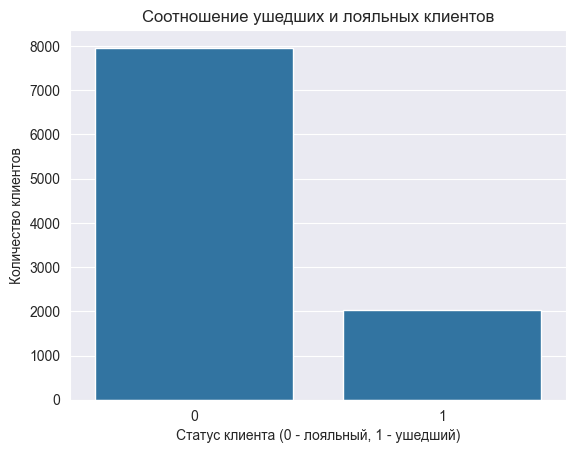

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

churn_data = pd.read_csv('data/churn.csv')
churn_data.head()

#Очистка данных
#Удалим столбец RowNumber, так как он не нужен для анализа.

data = churn_data.drop(columns=['RowNumber'])
#проверим таблицу.
#data.info()



# Распределение целевой переменной
sns.countplot(x='Exited', data=data)
plt.title('Соотношение ушедших и лояльных клиентов')
plt.xlabel('Статус клиента (0 - лояльный, 1 - ушедший)')
plt.ylabel('Количество клиентов')
plt.show()


На текущий момент единственное, что понятно, это то, что 20% клиентов ушли, надо понять, за какой это период?
Из тех данных, что есть в таблице, такой вывод сделать невозможно, по этому принимаем как факт и разбираемся дальше в причинах.

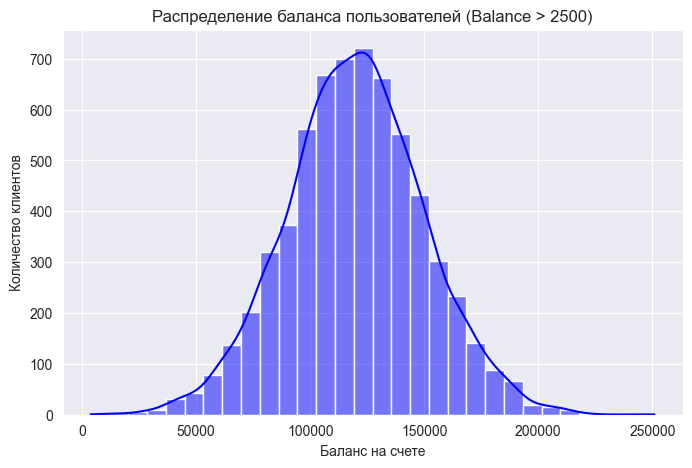

count      6383.000000
mean     119827.493793
std       30095.056462
min        3768.690000
25%      100181.975000
50%      119839.690000
75%      139512.290000
max      250898.090000
Name: Balance, dtype: float64


In [5]:
#9.2 Фильтрация данных: оставляем только клиентов с балансом больше 2500
filtered_data = data[data['Balance'] > 2500]

# Построение гистограммы распределения баланса
plt.figure(figsize=(8, 5))
sns.histplot(filtered_data['Balance'], bins=30, kde=True, color='blue')
plt.title('Распределение баланса пользователей (Balance > 2500)')
plt.xlabel('Баланс на счете')
plt.ylabel('Количество клиентов')
plt.show()
print(filtered_data['Balance'].describe())

Однозначно можно сделать выводы такие, что в целом структурный баланс клиентов в правильном распределении, на первый взгляд все хорошо. Но мы должны узнать, что происходит и какие балансы у клиентов, которые ушли? 

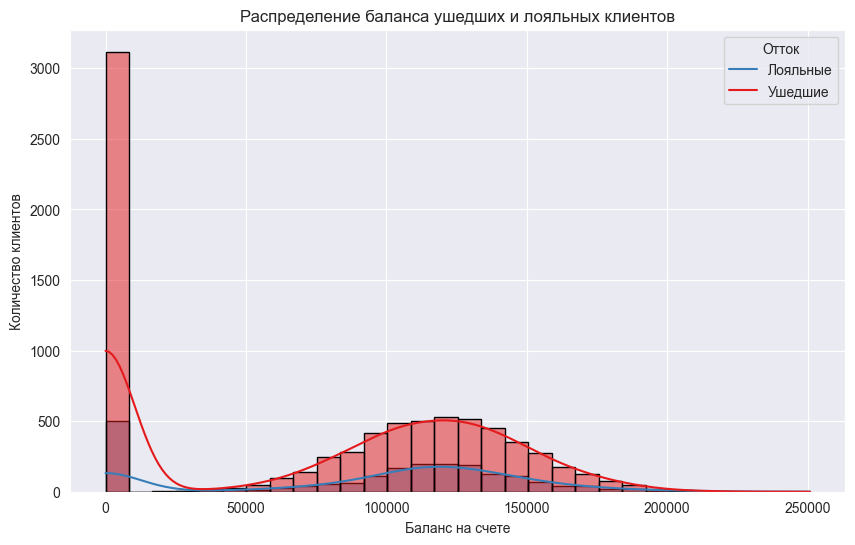

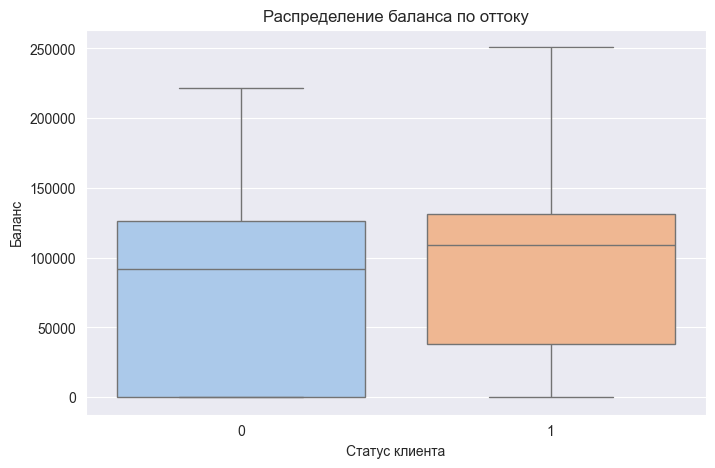

In [15]:
#9.3  Построение гистограммы и графика плотности для баланса в разрезе оттока
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Balance', hue='Exited', bins=30, kde=True, palette='Set1', edgecolor='black')
plt.title('Распределение баланса ушедших и лояльных клиентов')
plt.xlabel('Баланс на счете')
plt.ylabel('Количество клиентов')
plt.legend(title='Отток', labels=['Лояльные', 'Ушедшие'])
plt.show()


plt.figure(figsize=(8, 5))
sns.boxplot(
    data=data, 
    x='Exited', 
    y='Balance', 
    hue='Exited',  # Добавляем hue
    palette='pastel', 
    legend=False    # Отключаем легенду
)
plt.title('Распределение баланса по оттоку')
plt.xlabel('Статус клиента')
plt.ylabel('Баланс')
plt.show()

Ушедшие клиенты чаще имеют либо очень низкий баланс (близкий к нулю), либо очень высокий. Низкий баланс может указывать на неудовлетворенность условиями, а высокий — на переход в конкурирующие банки с лучшими предложениями.

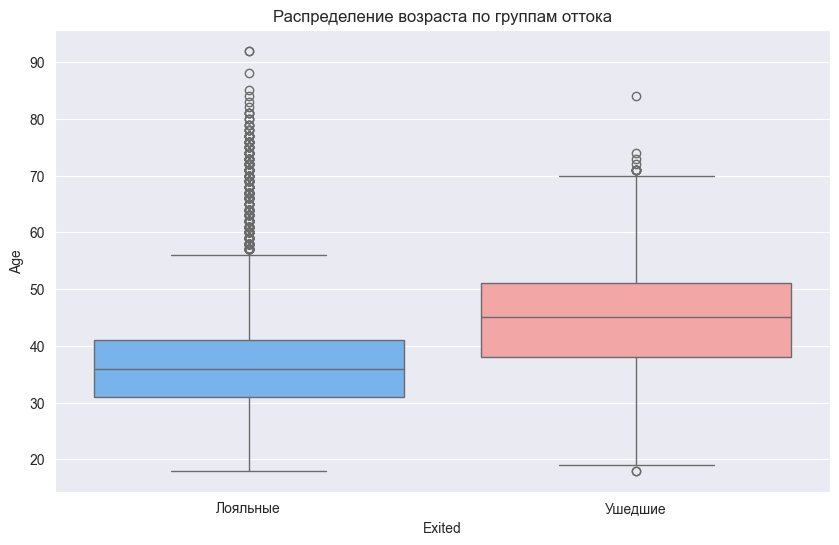

In [26]:
#9.4. Распределение возраста по оттоку

plt.figure(figsize=(10, 6))
sns.boxplot(x='Exited', y='Age', data=data, hue='Exited', palette=['#66b3ff', '#ff9999'], legend=False)
plt.title('Распределение возраста по группам оттока')
plt.xticks([0, 1], ['Лояльные', 'Ушедшие'])
plt.legend([],[], frameon=False)  # Убираем легенду, если она не нужна
plt.show()

Ушедшие клиенты в среднем старше (медиана ~45 лет). Выбросы присутствуют в группе лояльных клиентов (возраст >70 лет). Банку стоит обратить внимание на клиентов старше 40 лет, так как они чаще уходят.

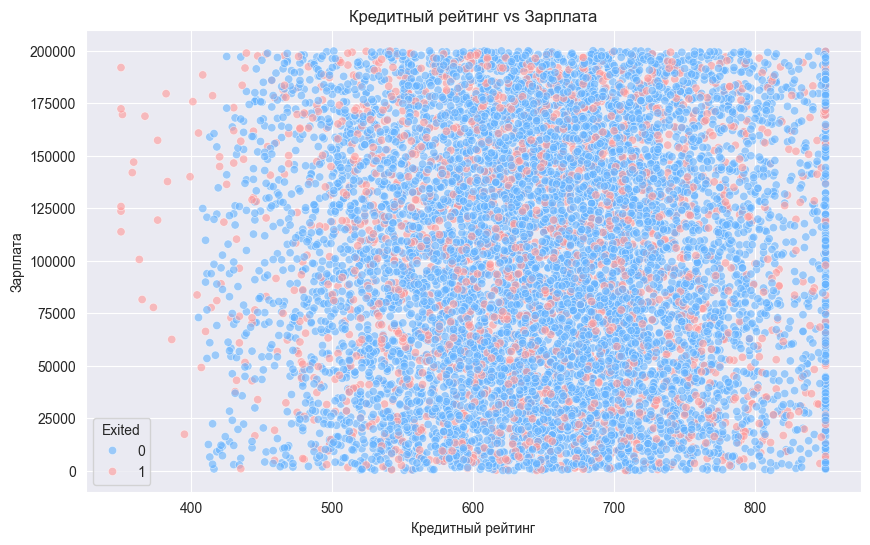

In [18]:
#9.5. Взаимосвязь кредитного рейтинга и зарплаты

plt.figure(figsize=(10, 6))
sns.scatterplot(x='CreditScore', y='EstimatedSalary', hue='Exited', data=data, palette=['#66b3ff', '#ff9999'], alpha=0.6)
plt.title('Кредитный рейтинг vs Зарплата')
plt.xlabel('Кредитный рейтинг')
plt.ylabel('Зарплата')
plt.show()

Никакой связи и закономерности не выявлено, валят все:)

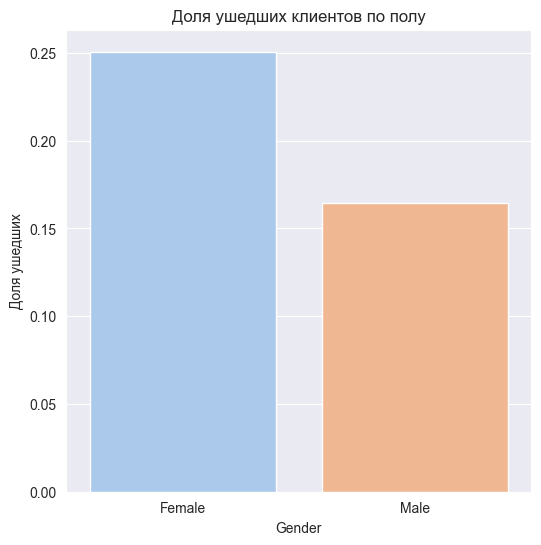

In [27]:
#9.6. Отток по полу

gender_churn = data.groupby('Gender')['Exited'].mean().reset_index()
plt.figure(figsize=(6, 6))
sns.barplot(x='Gender', y='Exited', data=gender_churn, hue='Gender', palette='pastel', legend=False)
plt.title('Доля ушедших клиентов по полу')
plt.ylabel('Доля ушедших')
plt.legend([],[], frameon=False)  # Убираем легенду, если она не нужна
plt.show()

Мужчинам не нравится больше условия, которые предлагает банк, т.к. женщины более лояльны. 

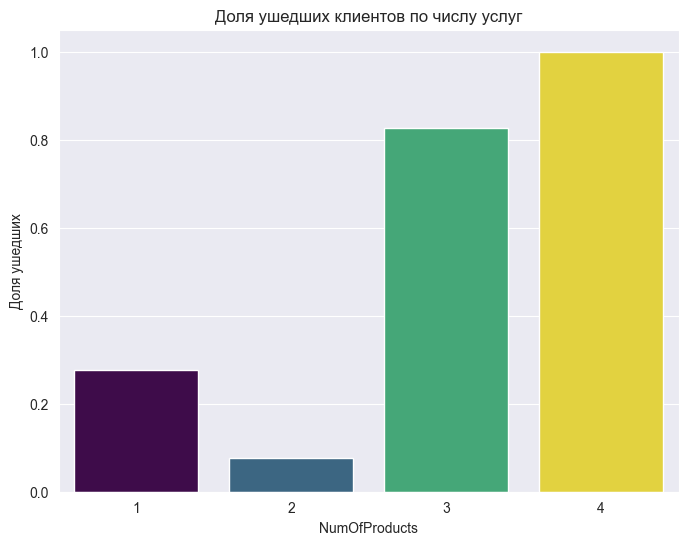

In [28]:
#9.7. Зависимость оттока от числа услуг

services_churn = data.groupby('NumOfProducts')['Exited'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='NumOfProducts', y='Exited', data=services_churn, hue='NumOfProducts', palette='viridis', legend=False)
plt.title('Доля ушедших клиентов по числу услуг')
plt.ylabel('Доля ушедших')
plt.legend([],[], frameon=False)  # Убираем легенду, если она не нужна
plt.show()


Клиенты с 1 услугой уходят реже (7%), а с 3–4 услугами — чаще (80%), создается ощущение, что чем больше продуктов, тем хуже сервис, проблема сервиса или непродуманности продуктов или экосистемы?

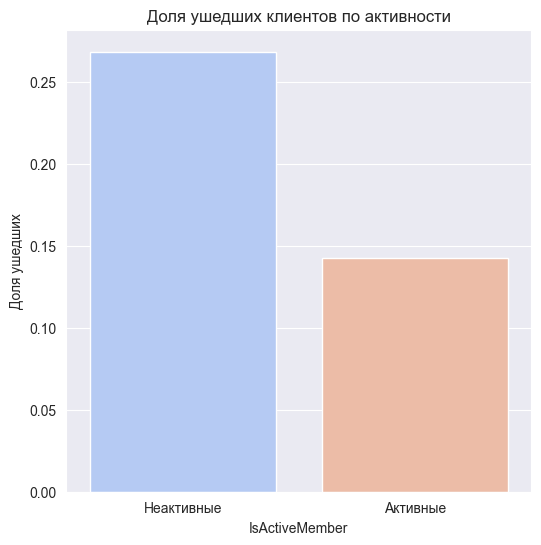

In [29]:
#9.8. Влияние активности клиента

active_churn = data.groupby('IsActiveMember')['Exited'].mean().reset_index()

plt.figure(figsize=(6, 6))
sns.barplot(x='IsActiveMember', y='Exited', data=active_churn, hue='IsActiveMember', palette='coolwarm', legend=False)
plt.title('Доля ушедших клиентов по активности')
plt.xticks([0, 1], ['Неактивные', 'Активные'])
plt.ylabel('Доля ушедших')
plt.legend([],[], frameon=False)  # Убираем легенду, если она не нужна
plt.show()

Ожидаемое, если клиент неактивен, то его не устраивают условия или продукты, либо сервис.

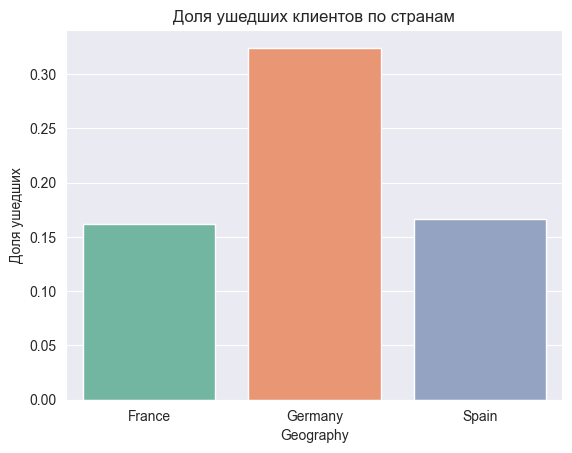

In [30]:
#9.9. Отток по странам

country_churn = data.groupby('Geography')['Exited'].mean().reset_index()

sns.barplot(x='Geography', y='Exited', data=country_churn, hue='Geography', palette='Set2', legend=False)
plt.title('Доля ушедших клиентов по странам')
plt.ylabel('Доля ушедших')
plt.show()



Немцы педанты - значит плохой сервис

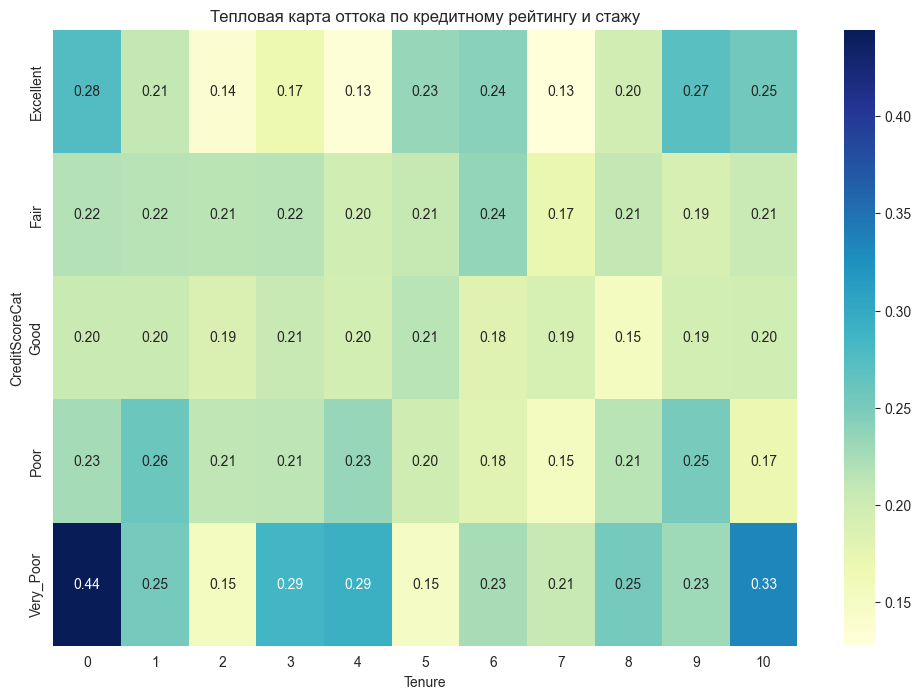

In [33]:
#9.10. Категории кредитного рейтинга и тепловая карта

def get_credit_score_cat(credit_score):
    if 300 <= credit_score < 500: return "Very_Poor"
    elif 500 <= credit_score < 601: return "Poor"
    elif 601 <= credit_score < 661: return "Fair"
    elif 661 <= credit_score < 781: return "Good"
    elif 781 <= credit_score < 851: return "Excellent"
    elif credit_score >= 851: return "Top"
    else: return "Deep"

data['CreditScoreCat'] = data['CreditScore'].apply(get_credit_score_cat)
pivot_table = data.pivot_table(index='CreditScoreCat', columns='Tenure', values='Exited', aggfunc='mean')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Тепловая карта оттока по кредитному рейтингу и стажу')
plt.show()

Наибольший отток наблюдается у клиентов с категорией кредитного рейтинга very poor и стажем 8–10 лет и совсем новые клиенты. Банку стоит улучшить условия для этих групп для привлечения капитала. Т.к. кредитный рейтинг и деньги на счете - связаны слабо.

ИТОГ, 

1. Сервис не всех устраивает, т.к. наибольший отток наблюдается в Германии, соответственно банку необходимо внедрить метрики качества сервиса, который он оказывает своим клиентам.
2. Клиенты в возрасте - нужно персонализировать для них спец. предложения, возможно добавить партнерские программы по медицине, что тревожных возрастных клиентов заставит чувствовать себя спокойнее.
3. Приличное кол-во неактивных клиентов, надо поощрять за активность - разработать какие-то программы для всех категорий, типа кэшбэков
4. И самое сложное - еще раз внимательно посмотреть на экосистему в целом, создается ощущение, что когда банк предоставляет более, чем  1 услугу - начинаются приключения у клиентов и это их не устраивает.
